In [163]:
from ds_preamble import *

In [164]:
df = pd.read_csv('data.csv')
df.info()
df.describe()
df.isna().mean().sort_values(ascending=False).multiply(100)[lambda x: x>0]

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   occur_date       1274 non-null   object 
 1   ship_categ       1274 non-null   object 
 2   ship_brand       1066 non-null   object 
 3   ship_power       1066 non-null   float64
 4   ship_eng_nb      1066 non-null   float64
 5   ship_eng_year    1066 non-null   float64
 6   ship_build_year  1066 non-null   float64
 7   ship_hull        1066 non-null   object 
 8   ship_length      1066 non-null   float64
 9   ship_tonnage     1066 non-null   float64
 10  claim_cost       1274 non-null   float64
 11  head_quarter     1045 non-null   object 
dtypes: float64(7), object(5)
memory usage: 119.6+ KB


,ship_power,ship_eng_nb,ship_eng_year,ship_build_year,ship_length,ship_tonnage,claim_cost
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1274.000000
mean,434.957786,1.070356,1996.525328,1979.853659,7.918668,30.898218,25.563658
std,294.940807,0.255867,6.206298,11.096130,2.997789,48.347233,159.226597
min,9.000000,1.000000,1967.000000,1932.000000,3.100000,0.600000,-109.900000
25%,239.000000,1.000000,1993.000000,1973.250000,5.900000,5.200000,1.200000
50%,367.000000,1.000000,1997.000000,1978.000000,7.200000,10.600000,4.100000
75%,567.000000,1.000000,2001.000000,1987.000000,9.350000,33.275000,10.975000
max,2517.000000,2.000000,2006.000000,2005.000000,21.000000,349.800000,3765.400000


head_quarter       17.974882
ship_brand         16.326531
ship_power         16.326531
ship_eng_nb        16.326531
ship_eng_year      16.326531
ship_build_year    16.326531
ship_hull          16.326531
ship_length        16.326531
ship_tonnage       16.326531
dtype: float64

,occur_date,ship_categ,ship_brand,ship_power,ship_eng_nb,ship_eng_year,ship_build_year,ship_hull,ship_length,ship_tonnage,claim_cost,head_quarter
0,2003-01-03,Filer,PERKINS,133.0,2.0,1998.0,1998.0,Alluminium Alloy,6.3,6.6,1.4,Arcachon
1,2003-01-03,Filer,NaN,372.0,2.0,2005.0,1981.0,Alluminium Alloy,13.7,186.6,3.9,La Cotiniere
2,2003-01-03,Troller,DEUTZ,443.0,1.0,1995.0,1979.0,polyester,6.7,14.2,0.6,Saint-Quay-Portrieux
3,2003-01-04,Trawler,Cummins,266.0,1.0,1994.0,1965.0,~Wood,6.4,10.1,2.7,Audierne
4,2003-01-04,Crab boat,BONI VALMET,145.0,1.0,1994.0,1969.0,Wood,5.2,4.2,1.5,Concarneau
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2006-05-27,Filer,Cummins,222.0,1.0,1976.0,1973.0,~Polyester,4.9,3.1,0.4,Grandcamp Maisy
1270,2006-05-27,Fishing vessel,YAMAHA,124.0,1.0,2005.0,1972.0,~Polyester,3.8,2.2,1.4,La Rochelle
1271,2006-05-29,Other,Iveco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,Granville
1272,2006-05-31,Filer,BAUDOUIN,354.0,1.0,1991.0,1981.0,Polyester,7.7,15.5,8.9,La Cotiniere


In [165]:
top_3 = df.ship_brand.value_counts().index[:3]

df_top_3 = df[df.ship_brand.isin(top_3)]

months = pd.to_datetime(df.occur_date).dt.month

df_top_3.groupby(months).claim_cost.mean().sort_values(ascending=False)

occur_date
5     77.467347
10    54.473684
8     38.284848
1     30.093750
12    15.603125
4     14.742105
9     10.459091
2      9.962162
3      9.770833
6      9.020833
7      5.978788
11     5.967308
Name: claim_cost, dtype: float64

In [166]:
df.ship_categ.value_counts()

to_replace = df.ship_categ.value_counts()[df.ship_categ.value_counts().lt(10)].index

# df.ship_categ.replace(to_replace, 'Other').value_counts()
df.ship_categ = df.ship_categ.replace(to_replace, 'Other')


Trawler                         380
Filer                           318
Other                           208
Crab boat                       137
Troller                          85
Fishing vessel                   45
Speedboat                        29
Shellfish boat                   16
Passenger vessel                 14
Coast catamaran                  13
Dredger                          11
Monohull                          8
Tuna boat                         2
Service boat                      2
Diving support ship               1
Tug catamaran                     1
Powered catamaran                 1
Sailing catamaran                 1
Sport catamaran                   1
Rigid-hulled inflatable boat      1
Name: ship_categ, dtype: int64

In [161]:
df.isna().mean()

occur_date         0.000000
ship_categ         0.000000
ship_brand         0.163265
ship_power         0.163265
ship_eng_nb        0.163265
ship_eng_year      0.163265
ship_build_year    0.163265
ship_hull          0.163265
ship_length        0.163265
ship_tonnage       0.163265
claim_cost         0.000000
head_quarter       0.179749
dtype: float64

In [168]:
df.select_dtypes(include='number').median()
df = df.fillna(df.select_dtypes(include='number').median())
df.isna().mean()

ship_power          367.0
ship_eng_nb           1.0
ship_eng_year      1997.0
ship_build_year    1978.0
ship_length           7.2
ship_tonnage         10.6
claim_cost            4.1
dtype: float64

occur_date         0.000000
ship_categ         0.000000
ship_brand         0.163265
ship_power         0.000000
ship_eng_nb        0.000000
ship_eng_year      0.000000
ship_build_year    0.000000
ship_hull          0.163265
ship_length        0.000000
ship_tonnage       0.000000
claim_cost         0.000000
head_quarter       0.179749
dtype: float64

In [138]:
df.ship_hull.value_counts()
names = df.ship_hull.unique()

names[5].capitalize()

d={}
# for name in names:
    # n

Polyester              367
Wood                   188
Steel                  116
Alluminium Alloy       105
polyester               47
*Polyester              26
wood                    23
~Polyester              22
~Steel                  15
Polyester&&             15
steel                   14
Polyester.21            13
*Wood                   12
~Wood                   11
Polyester@              11
alluminium alloy        10
Polyester#.             10
Steel.21                 7
Wood&&                   7
*Steel                   7
~Alluminium Alloy        6
Alluminium Alloy.21      4
Alluminium Alloy@        3
Wood Epoxy               3
Steel&&                  3
Alluminium Alloy#.       3
Wood@                    3
*Alluminium Alloy        3
Wood#.                   3
Wood.21                  2
Steel@                   2
Steel#.                  1
Wood Epoxy.21            1
Plasticized Plywood      1
Reinforced Plastic       1
Alluminium Alloy&&       1
Name: ship_hull, dtype: int6

'~polyester'

In [198]:
df_object = df.select_dtypes('object')
df = df.fillna(df_object.mode().iloc[0]) # remember that `df.mode` return a df, not a series!
df.isna().mean()

occur_date         0.0
ship_categ         0.0
ship_brand         0.0
ship_power         0.0
ship_eng_nb        0.0
ship_eng_year      0.0
ship_build_year    0.0
ship_hull          0.0
ship_length        0.0
ship_tonnage       0.0
claim_cost         0.0
head_quarter       0.0
dtype: float64

In [218]:
# pd.DataFrame(StandardScaler().fit_transform(df.select_dtypes('number')), columns=df.select_dtypes('number').columns)
df_num = df.select_dtypes('number')
(df_num-df_num.mean())/df_num.std()
df[df_num.columns]=(df_num-df_num.mean())/df_num.std()
df


,ship_power,ship_eng_nb,ship_eng_year,ship_build_year,ship_length,ship_tonnage,claim_cost
0,-1.073536,3.996763,0.246008,1.813644,-0.544987,-0.467836,-0.151756
1,-0.191418,3.996763,1.478538,0.142443,2.141224,3.545205,-0.136056
2,0.070634,-0.250006,-0.282219,-0.054169,-0.399786,-0.298397,-0.156781
3,-0.582650,-0.250006,-0.458294,-1.430452,-0.508686,-0.389805,-0.143592
4,-1.029246,-0.250006,-0.458294,-1.037228,-0.944288,-0.521344,-0.151128
...,...,...,...,...,...,...,...
1269,-0.745049,-0.250006,-3.627656,-0.644004,-1.053189,-0.545868,-0.158037
1270,-1.106754,-0.250006,1.478538,-0.742310,-1.452490,-0.565933,-0.151756
1271,-0.209873,-0.250006,0.069933,-0.152475,-0.218285,-0.378658,-0.138568
1272,-0.257854,-0.250006,-0.986521,0.142443,-0.036785,-0.269414,-0.104654


,occur_date,ship_categ,ship_brand,ship_power,ship_eng_nb,ship_eng_year,ship_build_year,ship_hull,ship_length,ship_tonnage,claim_cost,head_quarter
0,2003-01-03,Filer,PERKINS,-1.073536,3.996763,0.246008,1.813644,Alluminium Alloy,-0.544987,-0.467836,-0.151756,Arcachon
1,2003-01-03,Filer,BAUDOUIN,-0.191418,3.996763,1.478538,0.142443,Alluminium Alloy,2.141224,3.545205,-0.136056,La Cotiniere
2,2003-01-03,Troller,DEUTZ,0.070634,-0.250006,-0.282219,-0.054169,polyester,-0.399786,-0.298397,-0.156781,Saint-Quay-Portrieux
3,2003-01-04,Trawler,Cummins,-0.582650,-0.250006,-0.458294,-1.430452,~Wood,-0.508686,-0.389805,-0.143592,Audierne
4,2003-01-04,Crab boat,BONI VALMET,-1.029246,-0.250006,-0.458294,-1.037228,Wood,-0.944288,-0.521344,-0.151128,Concarneau
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2006-05-27,Filer,Cummins,-0.745049,-0.250006,-3.627656,-0.644004,~Polyester,-1.053189,-0.545868,-0.158037,Grandcamp Maisy
1270,2006-05-27,Fishing vessel,YAMAHA,-1.106754,-0.250006,1.478538,-0.742310,~Polyester,-1.452490,-0.565933,-0.151756,La Rochelle
1271,2006-05-29,Other,Iveco,-0.209873,-0.250006,0.069933,-0.152475,Polyester,-0.218285,-0.378658,-0.138568,Granville
1272,2006-05-31,Filer,BAUDOUIN,-0.257854,-0.250006,-0.986521,0.142443,Polyester,-0.036785,-0.269414,-0.104654,La Cotiniere


0.07611684684455722

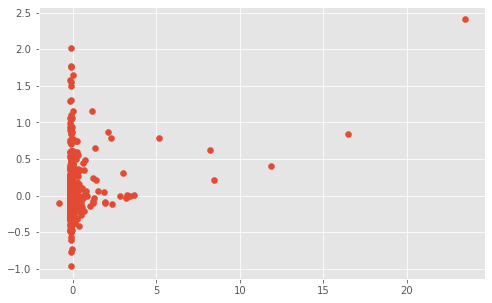

In [230]:
X=pd.get_dummies(df.drop(['occur_date','head_quarter','claim_cost'], axis=1))
y=df.claim_cost

model = LinearRegression().fit(X,y)
model.score(X,y)

plt.scatter(y, model.predict(X))


# df.select_dtypes('object').nunique()